# Filter lowly expressed genes and TMM normalize

Andreas Svendsen

In [ ]:
library(here)


here() starts at C:/Users/alosvendsen/OneDrive - Syddansk Universitet/PhD/Kurser/Biostat 2/biostat_project

### Filtering lowly expressed and duplicate genes

In [ ]:
# Load data
dge_data <- readRDS("outputs/data_processed/dge_data.rds")


#### Filter lowly expressed genes

Many possibilities. Use the filterByExpr funtion, or filter manually, as here:

In [ ]:
keep <-
  rowSums(cpm(dge_data) > 1) >= 2 # More than 1 CPM in at least 2 samples

table(keep)


keep
FALSE  TRUE 
49098 13612 

Subset data by the logical vector

In [ ]:
# Subset data by the logical vector
dge_data_filtered <- dge_data[keep, keep.lib.sizes = FALSE]
# keep.lib.sizes = FALSE, recomputes lib.sizes as number of rows changes.


Filter duplicates

Keeping only the duplicated gene with the highest transcript! Get total number of reads of each gene in all samples, order decreasing order. Order them so the highest transcripted duplicate is kept.

In [ ]:
count_sums_ordered <-
  order(rowSums(dge_data_filtered$counts), decreasing = TRUE)


This object now contains an integer vector containing the indicies of each gene in descending order of the total numer og counts in all the samples.

Use this vector to order the data in descending order based on number of counts

In [ ]:
dge_data_filtered <- dge_data_filtered[count_sums_ordered, ]


Check for duplicate genes

In [ ]:
duplicates <- duplicated(dge_data_filtered$genes$symbol)
sum(duplicates) # Yields two duplicates.


[1] 2

View the duplicates

In [ ]:
duplicates_symbols <- dge_data_filtered$genes[duplicates, "symbol"]
dge_data_filtered$genes[dge_data_filtered$genes$symbol %in% duplicates_symbols, ]


          ENSEMBLE_ID   symbol                id_symbol
62473 ENSG00000291072  CROCCP2  ENSG00000291072;CROCCP2
23239 ENSG00000215908  CROCCP2  ENSG00000215908;CROCCP2
35431 ENSG00000240356 RPL23AP7 ENSG00000240356;RPL23AP7
62465 ENSG00000291064 RPL23AP7 ENSG00000291064;RPL23AP7

If any duplicates remove them with:

In [ ]:
dge_data_filtered <-
  dge_data_filtered[!duplicates, , keep.lib.sizes = FALSE]


### TMM normalization

The normalization DOES NOT change the raw count values, but provides scaling factors that are used in subsequent analyses to adjust for library size and compositional differences.

In [ ]:
dge_data_norm <- normLibSizes(dge_data_filtered, method = "TMM")


Inspect normalisation factors

In [ ]:
dge_data_norm$samples$norm.factors


 [1] 0.9784508 1.0028307 0.9865491 0.9878487 0.9016617 0.9046796 1.0010002
 [8] 1.0397491 1.0331277 1.0596380 0.9942724 0.9912140 1.0179186 1.0618761
[15] 1.0235744 1.0318880

#### Visualize data after normalization

Create logCPM matrices with both normalized and non-normalized libraries. By default cpm() uses lib size norm factors if presenst in DGEList.

In [ ]:
logcpm_before <- cpm(dge_data_filtered, log = TRUE, prior.count = 2)
head(logcpm_before)


            S1       S2       S5       S6       S7       S8      S11      S12
11069 16.47382 16.42465 16.45584 16.50192 15.08121 15.17085 16.21492 16.15015
17851 14.64432 14.47638 14.51025 14.56301 14.29800 14.42634 14.65385 14.47892
17336 13.54397 13.47746 13.57257 13.57304 15.28153 15.14676 13.76202 13.66599
17900 13.84504 13.73219 13.78835 13.81237 13.63511 13.67906 13.88106 13.62050
21399 13.90906 13.78777 13.92227 13.84408 13.68750 13.61888 13.77828 13.69885
17810 13.72859 13.68942 13.65477 13.60761 13.39235 13.51075 13.66887 13.56601
           S13      S14      S15      S16      S17      S18      S19      S20
11069 15.56477 15.41336 16.16742 16.14900 15.39813 15.39794 16.42623 16.38937
17851 14.72547 14.62170 14.56802 14.51735 15.20503 15.24215 14.48232 14.40512
17336 14.21048 14.11383 13.35491 13.41233 12.79757 12.72375 13.42062 13.33509
17900 14.09625 14.03945 13.76464 13.74038 14.39668 14.44148 13.77377 13.74587
21399 13.78843 13.91913 13.66965 13.64738 14.67082 14.49331 13.5

            S1       S2       S5       S6       S7       S8      S11      S12
11069 16.50525 16.42057 16.47538 16.51956 15.23055 15.31537 16.21348 16.09392
17851 14.67575 14.47230 14.52979 14.58064 14.44734 14.57086 14.65241 14.42269
17336 13.57540 13.47338 13.59210 13.59068 15.43087 15.29128 13.76058 13.60975
17900 13.87647 13.72811 13.80788 13.83001 13.78445 13.82358 13.87961 13.56426
21399 13.94049 13.78369 13.94181 13.86172 13.83684 13.76340 13.77683 13.64261
17810 13.76002 13.68534 13.67431 13.62525 13.54170 13.65527 13.66743 13.50978
           S13      S14      S15      S16      S17      S18      S19      S20
11069 15.51775 15.32979 16.17571 16.16173 15.37251 15.31132 16.39261 16.34408
17851 14.67845 14.53813 14.57631 14.53008 15.17940 15.15553 14.44871 14.35984
17336 14.16346 14.03026 13.36320 13.42506 12.77194 12.63714 13.38701 13.28981
17900 14.04924 13.95588 13.77292 13.75311 14.37106 14.35486 13.74015 13.70059
21399 13.74142 13.83555 13.67794 13.66011 14.64519 14.40670 13.5

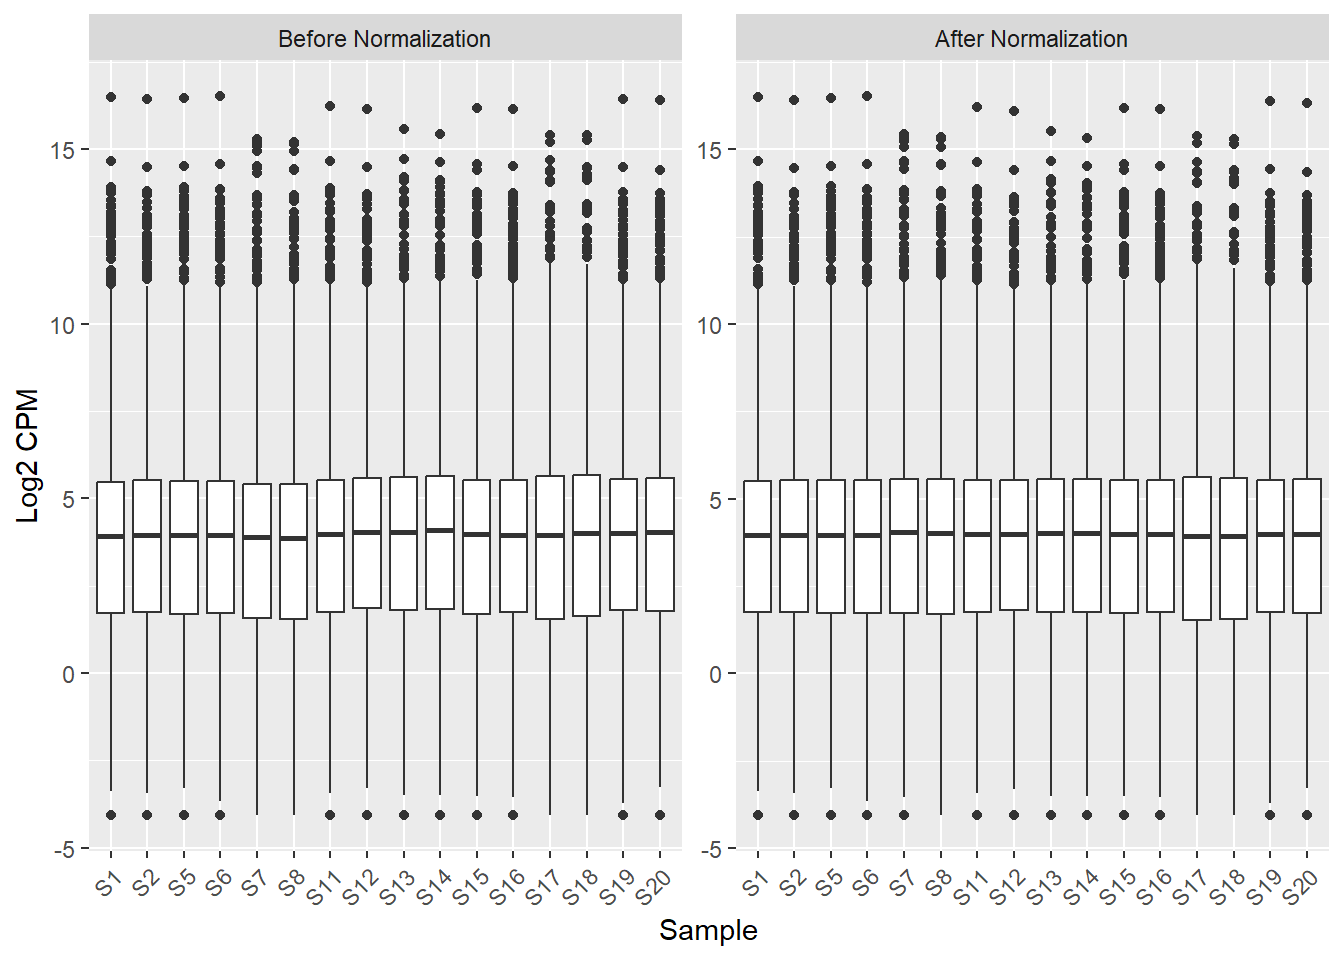

In [ ]:
# Convert matrices to data.tables
dt_before <- as.data.table(logcpm_before)
dt_after <- as.data.table(logcpm_after)
# Melt the data.tables and add a 'state' column
dt_before <-
  melt(dt_before,
       measure.vars = colnames(logcpm_before),
       variable.name = "Sample",
       value.name = "Log2_CPM"
  )
dt_before[, state := "Before Normalization"]

dt_after <-
  melt(dt_after,
       measure.vars = colnames(logcpm_after),
       variable.name = "Sample",
       value.name = "Log2_CPM"
  )
dt_after[, state := "After Normalization"]

# Combine the two data.tables
combined_dt <- rbind(dt_before, dt_after)

# Boxplots using ggplot2
p <- ggplot(combined_dt, aes(x = Sample, y = Log2_CPM)) +
  geom_boxplot() +
  labs(y = "Log2 CPM") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  facet_wrap(
    ~ factor(
      combined_dt$state,
      levels = c("Before Normalization", "After Normalization")
    ),
    scales = "free_y"
  )

p


### Save the filtered and normalized data

In [ ]:
# saveRDS(dge_data_norm, file = "outputs/data_processed/dge_data_norm.rds")


### Normalization

Normalization is crucial to account for technical biases and ensure that the counts are comparable across samples. Factors like sequencing depth, RNA composition, and library preparation can introduce variations that are not related to the underlying biology. Normalizing the data corrects for these factors.

The TMM (Trimmed Mean of M-values) normalization method is a popular choice in the edgeR package for RNA-seq count data. It helps adjust for compositional differences between libraries (samples). In essence, TMM aims to make the count distributions as similar as possible across samples, so that differences in counts can be attributed to genuine differential expression rather than technical biases.

RNA-seq data can be influenced by various factors, some of which are technical in nature. For example, differences in sequencing depth between samples can result in different total read counts. Another common issue is the presence of highly expressed genes that can dominate the total read count in a sample, thereby overshadowing other genes. The idea behind normalization is to adjust for these factors, so that the count data from different samples can be compared directly.

#### What is TMM trying to address?

When comparing two samples, if one gene is highly expressed in one sample compared to the other, it will “consume” a larger fraction of the total sequencing depth. This can create an illusion that other genes are downregulated in that sample, even if their absolute expression levels haven’t changed. This phenomenon is known as the “compositional difference.”